In [56]:
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import scipy

from scipy.stats import linregress
import scipy.stats as st
from sklearn import datasets
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [110]:
# Study data files
world_suicide_data_path_mg = "Mujgan_1/Suicide_Data_mg/master_mg.csv"
continent_path_mg = "Mujgan_1/Suicide_Data_mg/continents_mg.csv"

# Read the data and the study results
world_suicide_data_mg = pd.read_csv(world_suicide_data_path_mg)
continent_data_mg=pd.read_csv(continent_path_mg)

# Added another file for latitude
latitude_path_mg="Mujgan_1/Suicide_Data_mg/latitude.csv"
latitude_data=pd.read_csv(latitude_path_mg)


# Study data files
suicide_data_path = "Suicide_Data_AL/master.csv"
continent_path = "Suicide_Data_AL/continents.csv"

# Read the Suicide and Continent data
suicide_data = pd.read_csv(suicide_data_path)
continent_data = pd.read_csv(continent_path)
suicide_data.head()

# Study data files
world_suicide_data_path = "Suicide_Data_sn/master_sn.csv"
continents_list_data_path = "Suicide_Data_sn/continents_sn.csv"

# Read the data and the study results
world_suicide_data = pd.read_csv(world_suicide_data_path)
continents_list_data = pd.read_csv(continents_list_data_path)
    


# Mujgan Code

In [58]:
# Fixed Republic of Korea in the continents and the titles then merge the two dataframes
world_suicide_df_mg2=world_suicide_data_mg.merge(continent_data_mg, on="country", how="left" )
world_suicide_df_mg2.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent'],
      dtype='object')

In [59]:
# Bring continent column rigth after the index next to the country column
world_suicide_df_mg2=world_suicide_df_mg2[[ 'continent','country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]
world_suicide_df_mg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           27820 non-null  object 
 1   country             27820 non-null  object 
 2   year                27820 non-null  int64  
 3   sex                 27820 non-null  object 
 4   age                 27820 non-null  object 
 5   suicides_no         27820 non-null  int64  
 6   population          27820 non-null  int64  
 7   suicides/100k pop   27820 non-null  float64
 8   country-year        27820 non-null  object 
 9   HDI for year        8364 non-null   float64
 10  gdp_for_year ($)    27820 non-null  object 
 11  gdp_per_capita ($)  27820 non-null  int64  
 12  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


In [60]:
# Counting the number of data per to decide which years to filter
dseries_mg=world_suicide_df_mg2["year"].value_counts()
dseries_mg


2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [61]:
# QA/QC for the number of countries vs. data counts
ds=world_suicide_df_mg2["country"].value_counts()
print(ds)

Mauritius                 382
Iceland                   382
Austria                   382
Netherlands               382
Israel                    372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Dominica                   12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [62]:
# Main DataFrame Pre-Filtered merged with continents
world_suicide_df_mg2.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Europe,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Europe,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Europe,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Europe,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Europe,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [63]:
#Write filtered data to new CSV
# Output File (CSV)


#Extract relevant fields from the data frame
# Export the City_Data into a csv
#world_suicide_df.to_csv(r'../output_data/merged.csv', index=False)
world_suicide_df_mg2.to_csv('Mujgan_1/Output_Data_mg/merged.csv', index=False)

In [64]:
# #Filtering the data from 2000 to 2014

world_suicide_df_2 = world_suicide_df_mg2.loc[(world_suicide_df_mg2["year"]>1999) & (world_suicide_df_mg2["year"]<=2014) ]
#world_suicide_df_2.to_csv('Output_Data/new.csv', index=False)

In [65]:
# Dropping the countries which do not have consistent data between 2000 to 2014 and writing it to csv in case needed
# Later on I will merge new_df2 with the main dataframe two further filter the entire dataframe

new_df=world_suicide_df_2.groupby(["country"]).size()
new_df2=new_df.reset_index(name='count')
new_df2=new_df2.loc[new_df2["count"]==180]
new_df2.info()
new_df2.to_csv('Mujgan_1/Output_Data_mg/new2.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 94
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  58 non-null     object
 1   count    58 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [66]:
# New merge to create a brand new DataFrame for the new filtered DataFrame from 2000 to 2014
data_2000_2014=world_suicide_df_2.merge(new_df2, how="inner", on="country")
data_2000_2014.to_csv('Mujgan_1/Output_Data_mg/2000_2014.csv', index=False)
data_2000_2014.head()


,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,count
0,South America,Argentina,2000,male,75+ years,232,525161,44.18,Argentina2000,0.762,"284,203,750,000",8462,G.I. Generation,180
1,South America,Argentina,2000,male,55-74 years,602,2333377,25.80,Argentina2000,0.762,"284,203,750,000",8462,Silent,180
2,South America,Argentina,2000,male,35-54 years,578,4096814,14.11,Argentina2000,0.762,"284,203,750,000",8462,Boomers,180
3,South America,Argentina,2000,male,15-24 years,463,3306109,14.00,Argentina2000,0.762,"284,203,750,000",8462,Generation X,180
4,South America,Argentina,2000,male,25-34 years,331,2602314,12.72,Argentina2000,0.762,"284,203,750,000",8462,Generation X,180


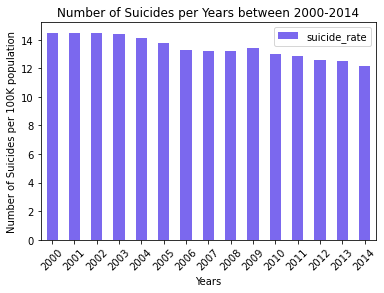

In [67]:
# Question 1 - Global Rate of Suicide increasing or Decreasing
global_15yrs=data_2000_2014.groupby("year").sum()
df_bar=global_15yrs.reset_index()
df_bar["suicide_rate"]=(df_bar["suicides_no"]/df_bar["population"])*100000
df_bar.plot(kind="bar",x="year", y="suicide_rate",rot=45, color="mediumslateblue")
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Years")
plt.title("Number of Suicides per Years between 2000-2014")
plt.show()

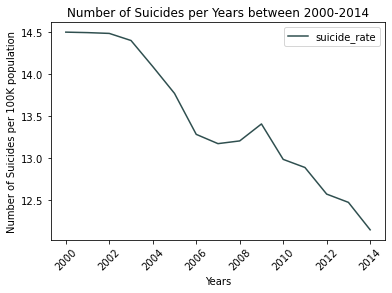

In [68]:
# Question 1-As line plot
df_bar.plot(kind="line",x="year", y="suicide_rate",rot=45, color="darkslategray")
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Years")
plt.title("Number of Suicides per Years between 2000-2014")
plt.show()


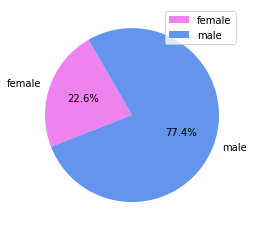

In [69]:
# Question 1a) - Global Rate of Suicide per sex
gender_15yrs=data_2000_2014.groupby("sex").sum()
gender_15yrs2=gender_15yrs[["suicides_no"]]
gender_15yrs2=gender_15yrs2.rename(columns={"suicides_no": " "})
gender_15yrs2=gender_15yrs2.plot(kind="pie",subplots=True, autopct="%1.1f%%",startangle=120,colors = ['violet', 'cornflowerblue'])
plt.show()


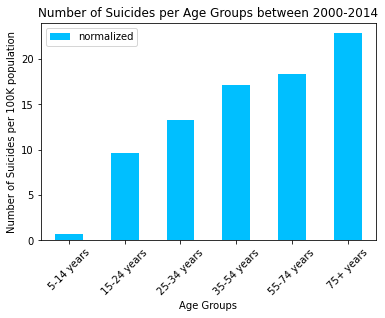

In [70]:
# Question 1b) - Global Rate of Suicide per AgeGroup
age_15yrs=data_2000_2014.groupby("age").sum()
df_age=age_15yrs.reset_index()
# list1=[2,3,4,1,5,6]
# series=pd.Series(list1)
df_age2 = df_age.assign(list1=[2,3,4,1,5,6]) 
df_age2["normalized"]=df_age2["suicides_no"]/(df_age2["population"]/100000)
df_age3=df_age2.sort_values(by=["list1"])

df_age3.plot(kind="bar",x="age", y="normalized",rot=45, color="deepskyblue")
plt.ylabel("Number of Suicides per 100K population")
plt.xlabel("Age Groups")
plt.title("Number of Suicides per Age Groups between 2000-2014")
plt.show()

In [71]:
gender_15yrs

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),count
sex,,,,,,,
female,10476540,712491,12022846328,29516.56,1848.054,123343692,939600
male,10476540,2440636,11448106398,113814.12,1848.054,123343692,939600


In [72]:
# New DataFrame for the most countries for year 2009, because it has the most countries.

data_2009 = world_suicide_df_mg2.loc[(world_suicide_df_mg2["year"]==2009)] 
data_2009.to_csv('Mujgan_1/Output_Data_mg/2009.csv', index=False)
data_2009.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
240,Europe,Albania,2009,female,15-24 years,0,270003,0.0,Albania2009,NaN,"12,044,212,904",4387,Millenials
241,Europe,Albania,2009,female,25-34 years,0,182712,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation X
242,Europe,Albania,2009,female,35-54 years,0,394286,0.0,Albania2009,NaN,"12,044,212,904",4387,Boomers
243,Europe,Albania,2009,female,5-14 years,0,236174,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation Z
244,Europe,Albania,2009,female,55-74 years,0,233302,0.0,Albania2009,NaN,"12,044,212,904",4387,Silent


In [73]:
#Aggregate the total suicide_no per country for 2009 for quality check

data_2009_agg=data_2009.groupby("country").agg({"suicides_no":["sum"]})
data_2009_agg.columns = ['total_suicide_number']
data_2009_agg_by_num=data_2009_agg.reset_index()
data_2009_to_drop=data_2009_agg_by_num.loc[data_2009_agg_by_num["total_suicide_number"]==0]
data_2009_to_drop

,country,total_suicide_number
0,Albania,0
1,Antigua and Barbuda,0
33,Grenada,0


In [74]:
#Remove zero values, count number of countries =86 and continents = 6
data_2009_i=data_2009.set_index(['country'])
data_2009_clean=data_2009_i.loc[~data_2009_i.index.isin(['Albania','Antigua and Barbuda', 'Grenada'])]
data_2009_clean=data_2009_clean.reset_index()
data_2009_clean

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,South America,2009,male,75+ years,177,653486,27.09,Argentina2009,NaN,"332,976,484,578",8961,Silent
1,Argentina,South America,2009,male,15-24 years,609,3436265,17.72,Argentina2009,NaN,"332,976,484,578",8961,Millenials
2,Argentina,South America,2009,male,55-74 years,434,2683502,16.17,Argentina2009,NaN,"332,976,484,578",8961,Silent
3,Argentina,South America,2009,male,25-34 years,504,3210244,15.70,Argentina2009,NaN,"332,976,484,578",8961,Generation X
4,Argentina,South America,2009,male,35-54 years,542,4566645,11.87,Argentina2009,NaN,"332,976,484,578",8961,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Uzbekistan,Asia,2009,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
1028,Uzbekistan,Asia,2009,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers
1029,Uzbekistan,Asia,2009,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
1030,Uzbekistan,Asia,2009,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z


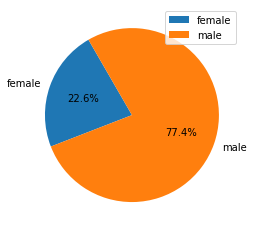

In [75]:
# Question 1a) - Global Rate of Suicide per sex for year 2009
gender_2009=data_2009_clean.groupby("sex").sum()
gender_2009_2=gender_2009[["suicides_no"]]
gender_2009_2=gender_2009_2.rename(columns={"suicides_no": " "})
gender_2009_2=gender_2009_2.plot(kind="pie",subplots=True, autopct="%1.1f%%",startangle=120)
plt.show()


In [76]:
gender_2009

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,1036644,54920,1006509254,2418.08,0.0,11911452
male,1036644,188567,966793226,9757.96,0.0,11911452


The r-squared is: 0.0013388605890040572
y = 0.0x + 11.17


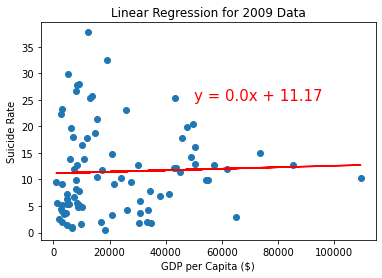

In [77]:
#Linear Regression

df_linear_2009=data_2009_clean.groupby("country").sum()
df_linear_2009=df_linear_2009.reset_index()
df_linear_2009["GDP per Capita"]=((df_linear_2009["gdp_per_capita ($)"]/12))
df_linear_2009["suicide_normalized"]=(df_linear_2009["suicides_no"]/df_linear_2009['population'])*100000

x_values = df_linear_2009['GDP per Capita']
y_values = df_linear_2009['suicide_normalized']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,25),fontsize=15, color="red")
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicide Rate')
plt.title('Linear Regression for 2009 Data')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

In [78]:
# Multiple Linear Regression
# Creating a line equation with two x values and a y value

df_linear_2009=data_2009_clean.groupby("country").sum()
df_linear_2009=df_linear_2009.reset_index()
df_linear_2009["GDP per Capita"]=((df_linear_2009["gdp_per_capita ($)"]/12))
df_linear_2009["suicide_normalized"]=(df_linear_2009["suicides_no"]/df_linear_2009['population'])*100000

df_linear_2009["GDP per Capita"].values #x1
df_linear_2009['population'].values #x2
df_linear_2009["suicide_normalized"].values #y

# Defining x and y into arrays to use in the function
new_x = np.concatenate(([df_linear_2009["GDP per Capita"].values],[df_linear_2009['population'].values]))
new_y = df_linear_2009["suicide_normalized"].values

# The function below returns Multiple Linear Regression Coefficients a, b and c

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1] 

popt, pcov = curve_fit(fn, new_x, new_y)
print(popt)

[1.09541571e+01 1.32890529e-05 1.01645443e-08]


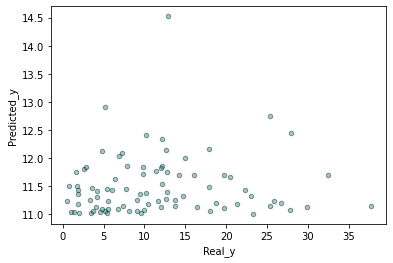

In [79]:
%matplotlib inline

# This is to create a prediction from the line equation to compare the y values (sucide rate) and predicted_y values 
# to undersand if the correlation works fine or not
predicted_y = fn(new_x, 1.09541571e+01,1.32890529e-05,1.01645443e-08 )

pr_y=pd.Series(predicted_y)
n_y=pd.Series(new_y)

frame={"Real_y":n_y, "Predicted_y":pr_y}
df_plot=pd.DataFrame(frame)
df_plot.head()
scatter_plot = df_plot.plot(kind='scatter',x="Real_y", y="Predicted_y",color = 'teal',alpha=0.4, edgecolors="black",marker="o")
scatter_plot
plt.show()


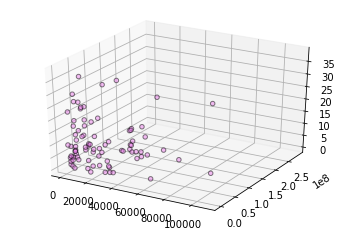

In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(np.array(new_x[0]),np.array( new_x[1]), np.array(new_y), alpha=0.5, color="violet",edgecolors="black")
plt.show()

In [111]:
# Finding out Lat. vs Suicide Rate 

merged2009_with_lat_df=data_2009_clean.merge(latitude_data, on="country", how="inner" )
merged2009_with_lat_df.head()
merged2009_with_lat_df.to_csv('Mujgan_1/Output_Data_mg/lat_2009_suicide.csv', index=False)
data_2009_clean.to_csv('Mujgan_1/Output_Data_mg/2009_suicide.csv', index=False)

In [112]:
#Latitude Added to 2009

merged2009_with_lat_df1=merged2009_with_lat_df.groupby("country").sum()
merged2009_with_lat_df1=merged2009_with_lat_df1.reset_index()
merged2009_with_lat_df1["GDP per Capita"]=((merged2009_with_lat_df1["gdp_per_capita ($)"]/12))
merged2009_with_lat_df1["Latitude"]=((merged2009_with_lat_df1["latitude"]/12))
merged2009_with_lat_df1["suicide_normalized"]=(merged2009_with_lat_df1["suicides_no"]/merged2009_with_lat_df1['population'])*100000
merged2009_with_lat_df1.head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),latitude,longitude,GDP per Capita,Latitude,suicide_normalized
0,Argentina,24108,2884,37158001,107.32,0.0,107532,-460.993164,-763.400064,8961.0,-38.416097,7.761451
1,Armenia,24108,53,2689695,33.70,0.0,38580,480.829188,540.458268,3215.0,40.069099,1.970484
2,Aruba,24108,4,94795,42.23,0.0,316332,150.253320,-839.620056,26361.0,12.521110,4.219632
3,Australia,24108,2337,20529317,130.12,0.0,541536,-303.292776,1605.301632,45128.0,-25.274398,11.383720
4,Austria,24108,1278,7946894,213.22,0.0,604272,570.194772,174.600864,50356.0,47.516231,16.081755


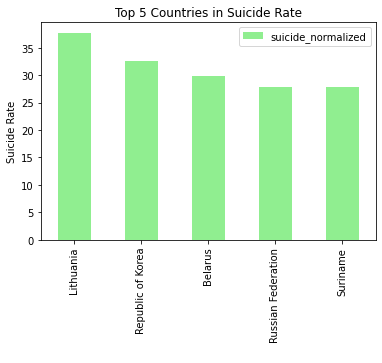

In [114]:
# Top 5 countries for suicide rate of 2009
df_3=merged2009_with_lat_df1.nlargest(5, 'suicide_normalized')

df_3.plot(kind = "bar", x="country", y="suicide_normalized", color="lightgreen")
plt.xlabel(' ')
plt.ylabel('Suicide Rate')
plt.title("Top 5 Countries in Suicide Rate")
plt.savefig('Mujgan_1/Output_Data_mg/Top5countries2009.png')
plt.show()

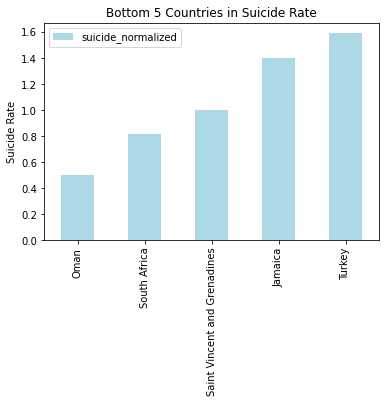

In [115]:
# Bottom 5 countries for suicide rate of 2009
merged2009_with_lat_df1.nsmallest(10, 'suicide_normalized')

# Top 5 countries for suicide rate of 2009
df_4=merged2009_with_lat_df1.nsmallest(5, 'suicide_normalized')

df_4.plot(kind = "bar", x="country", y="suicide_normalized", color="lightblue")
plt.xlabel(' ')
plt.ylabel('Suicide Rate')
plt.title("Bottom 5 Countries in Suicide Rate")
plt.savefig('Mujgan_1/Output_Data_mg/Bottom5countries2009.png')

plt.show()

In [116]:
# Correlation Matrix
merged2009_with_lat_df2=merged2009_with_lat_df1.drop(columns=['year','suicides/100k pop', 'HDI for year','latitude', 'longitude',
                                                             "gdp_per_capita ($)"])
corr = merged2009_with_lat_df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,suicides_no,population,GDP per Capita,Latitude,suicide_normalized
suicides_no,1.000000,0.824750,0.085164,0.170824,0.344315
population,0.824750,1.000000,0.039592,0.023738,0.054070
GDP per Capita,0.085164,0.039592,1.000000,0.353706,0.036590
Latitude,0.170824,0.023738,0.353706,1.000000,0.366834
suicide_normalized,0.344315,0.054070,0.036590,0.366834,1.000000


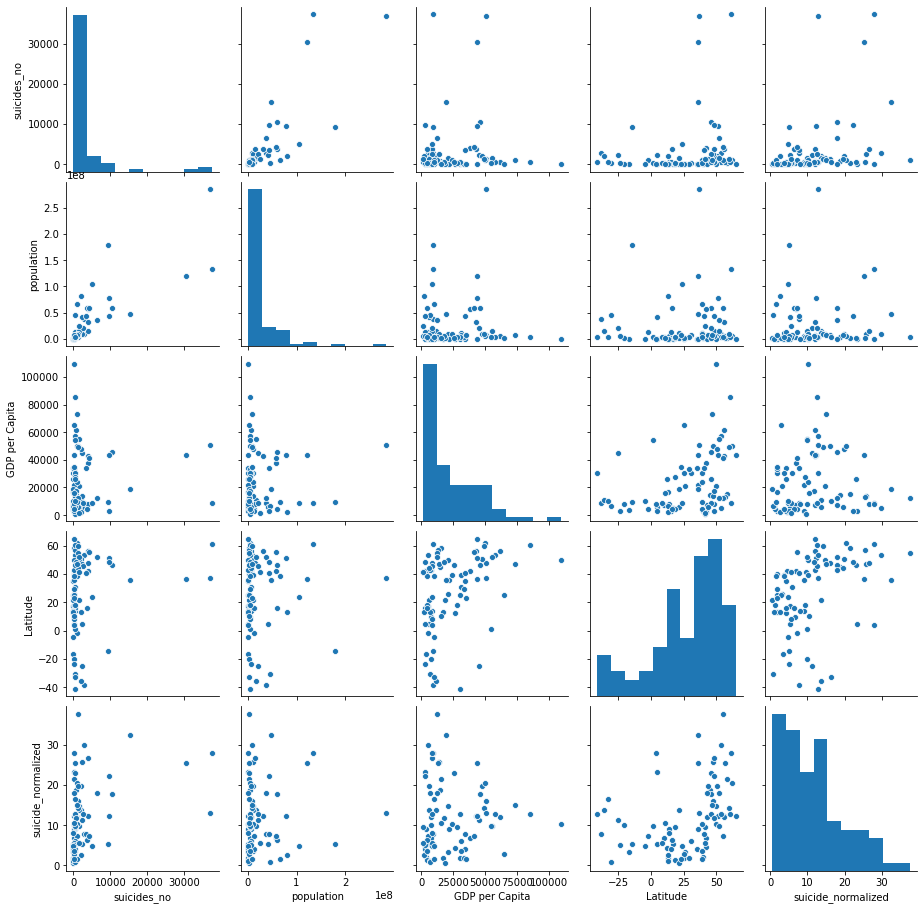

In [117]:
# Basic correlogram
sns.pairplot(merged2009_with_lat_df2)


The r-squared is: 0.1345670337341077
y = 0.11x + 8.29


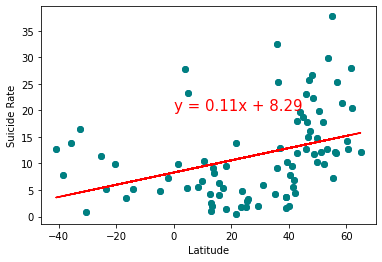

In [119]:
x2=merged2009_with_lat_df1["Latitude"]
y2=merged2009_with_lat_df1["suicide_normalized"]


plt.scatter(x2,y2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2,color="teal")
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Suicide Rate')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig('Mujgan_1/Output_Data_mg/Latitude_rate_year2009.png')
plt.show()


The r-squared is: 0.2007332595779445
y = 0.23x + 3.82


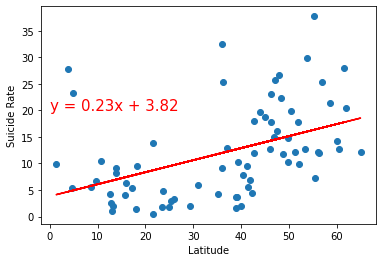

In [121]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = merged2009_with_lat_df1.loc[(merged2009_with_lat_df1["Latitude"]>=0)]
southern_hem_df = merged2009_with_lat_df1.loc[(merged2009_with_lat_df1["Latitude"]<0)]

x_values = northern_hem_df['Latitude']
y_values = northern_hem_df["suicide_normalized"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Suicide Rate')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig('Mujgan_1/Output_Data_mg/NorthernLatitude_rate_year2009.png')

plt.show()

The r-squared is: 0.22045248487712926
y = -0.17x + 4.13


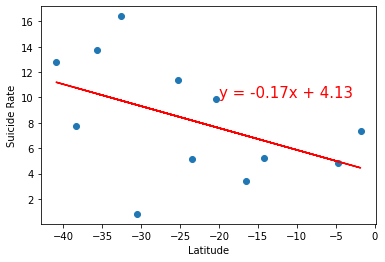

In [123]:
# Create Northern and Southern Hemisphere DataFrames
x_values = southern_hem_df['Latitude']
y_values = southern_hem_df["suicide_normalized"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Suicide Rate')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig('Mujgan_1/Output_Data_mg/SouthernLatitude_rate_year2009.png')
plt.show()

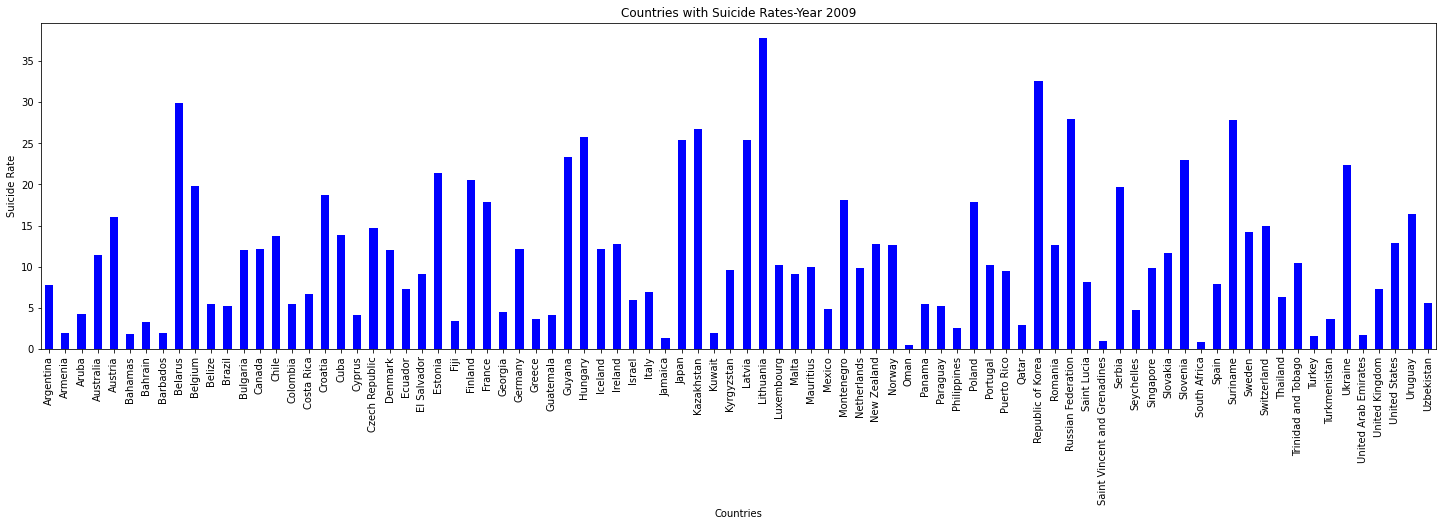

In [124]:
# 2009
y=merged2009_with_lat_df1["suicide_normalized"]
x=merged2009_with_lat_df1["country"]
merged2009_with_lat_df1.head()
merged2009_with_lat_df1.plot(kind="bar",x="country", y="suicide_normalized",rot=90, color="blue", legend=False, figsize=(25,6))
plt.ylabel("Suicide Rate")
plt.xlabel("Countries")
plt.title("Countries with Suicide Rates-Year 2009")
plt.savefig('Mujgan_1/Output_Data_mg/Countries_Year_2009.png')

plt.show()


# Ahmed's code

In [125]:
# Combine the suicide & continent data into a single dataset
combined_data = pd.merge(suicide_data, continent_data, on='country')
combined_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [126]:
# Checking the existence of null values in the DataFrame.
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27448 entries, 0 to 27447
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27448 non-null  object 
 1   year                27448 non-null  int64  
 2   sex                 27448 non-null  object 
 3   age                 27448 non-null  object 
 4   suicides_no         27448 non-null  int64  
 5   population          27448 non-null  int64  
 6   suicides/100k pop   27448 non-null  float64
 7   country-year        27448 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27448 non-null  object 
 10  gdp_per_capita ($)  27448 non-null  int64  
 11  generation          27448 non-null  object 
 12  continent           27448 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.9+ MB


In [127]:
# Create a clean DataFrame by dropping unwanted columns
combined_data.drop(['suicides/100k pop','HDI for year','generation'],axis=1, inplace=True)
combined_data.head()

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),continent
0,Albania,1987,male,15-24 years,21,312900,Albania1987,"2,156,624,900",796,Europe
1,Albania,1987,male,35-54 years,16,308000,Albania1987,"2,156,624,900",796,Europe
2,Albania,1987,female,15-24 years,14,289700,Albania1987,"2,156,624,900",796,Europe
3,Albania,1987,male,75+ years,1,21800,Albania1987,"2,156,624,900",796,Europe
4,Albania,1987,male,25-34 years,9,274300,Albania1987,"2,156,624,900",796,Europe


In [128]:
combined_data["year"].value_counts()

2009    1056
2001    1044
2010    1044
2007    1020
2011    1020
2002    1020
2003    1020
2000    1020
2006    1008
2008    1008
2005     996
2004     996
1999     984
2012     960
2013     948
1998     936
2014     924
1995     924
1996     912
1997     912
1994     804
1992     768
1993     768
1990     756
1991     756
2015     732
1987     636
1989     612
1988     576
1986     564
1985     564
2016     160
Name: year, dtype: int64

In [129]:
#Slice data from 2000 till 2010
suicide_data_2000s = combined_data[combined_data["year"].isin(range(2000,2011))]
suicide_data_2000s

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),continent
132,Albania,2000,male,25-34 years,17,232000,Albania2000,"3,632,043,908",1299,Europe
133,Albania,2000,male,55-74 years,10,177400,Albania2000,"3,632,043,908",1299,Europe
134,Albania,2000,female,75+ years,2,37800,Albania2000,"3,632,043,908",1299,Europe
135,Albania,2000,male,75+ years,1,24900,Albania2000,"3,632,043,908",1299,Europe
136,Albania,2000,female,15-24 years,6,263900,Albania2000,"3,632,043,908",1299,Europe
...,...,...,...,...,...,...,...,...,...,...
27395,Uzbekistan,2010,female,35-54 years,101,3339076,Uzbekistan2010,"39,332,770,929",1533,Asia
27396,Uzbekistan,2010,male,5-14 years,48,2751752,Uzbekistan2010,"39,332,770,929",1533,Asia
27397,Uzbekistan,2010,female,75+ years,5,322899,Uzbekistan2010,"39,332,770,929",1533,Asia
27398,Uzbekistan,2010,female,55-74 years,16,1161422,Uzbekistan2010,"39,332,770,929",1533,Asia


In [130]:
suicide_data_2000s.to_csv("output_data_AL/suicide_data_2000s.csv")

In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation
#and SEM of Suicide no for each country
suicide_data_2000s_by_country = suicide_data_2000s.groupby('country')
suicide_data_2000s_by_country.head()

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),continent
132,Albania,2000,male,25-34 years,17,232000,Albania2000,"3,632,043,908",1299,Europe
133,Albania,2000,male,55-74 years,10,177400,Albania2000,"3,632,043,908",1299,Europe
134,Albania,2000,female,75+ years,2,37800,Albania2000,"3,632,043,908",1299,Europe
135,Albania,2000,male,75+ years,1,24900,Albania2000,"3,632,043,908",1299,Europe
136,Albania,2000,female,15-24 years,6,263900,Albania2000,"3,632,043,908",1299,Europe
...,...,...,...,...,...,...,...,...,...,...
27304,Uzbekistan,2000,male,35-54 years,528,2289656,Uzbekistan2000,"13,760,374,488",632,Asia
27305,Uzbekistan,2000,male,25-34 years,355,1843476,Uzbekistan2000,"13,760,374,488",632,Asia
27306,Uzbekistan,2000,male,55-74 years,153,802122,Uzbekistan2000,"13,760,374,488",632,Asia
27307,Uzbekistan,2000,male,15-24 years,350,2492264,Uzbekistan2000,"13,760,374,488",632,Asia


In [132]:
# suicides_no_mean
suicides_no_mean = suicide_data_2000s_by_country['suicides_no'].mean()
# suicides_no_median
suicides_no_median = suicide_data_2000s_by_country['suicides_no'].median()
# suicides_no_variance
suicides_no_variance = suicide_data_2000s_by_country['suicides_no'].var()
# suicides_no_std
suicides_no_std = suicide_data_2000s_by_country['suicides_no'].std()
# suicides_no_sem
suicides_no_sem = suicide_data_2000s_by_country['suicides_no'].sem()

# include statistical analysis series in a df
suicides_no_stats = pd.concat([suicides_no_mean, suicides_no_median, suicides_no_variance, suicides_no_std, suicides_no_sem], axis=1)
suicides_no_stats.columns = ['suicides_no_mean','suicides_no_median','suicides_no_variance','suicides_no_std','suicides_no_sem']
suicides_no_stats

,suicides_no_mean,suicides_no_median,suicides_no_variance,suicides_no_std,suicides_no_sem
country,,,,,
Albania,7.242424,4.0,7.574231e+01,8.703006,0.757499
Antigua and Barbuda,0.066667,0.0,7.955182e-02,0.282049,0.025747
Argentina,253.606061,168.5,4.651398e+04,215.671002,18.771751
Armenia,5.481481,3.0,3.395292e+01,5.826914,0.560695
Aruba,0.568182,0.0,1.041117e+00,1.020352,0.088810
...,...,...,...,...,...
United Arab Emirates,8.638889,3.0,1.740368e+02,13.192300,1.554727
United Kingdom,344.363636,221.5,1.429073e+05,378.030842,32.903361
United States,2782.643939,2282.5,8.516644e+06,2918.328966,254.007933


In [133]:
suicides_no_stats.to_csv("output_data_AL/suicides_no_stats.csv")

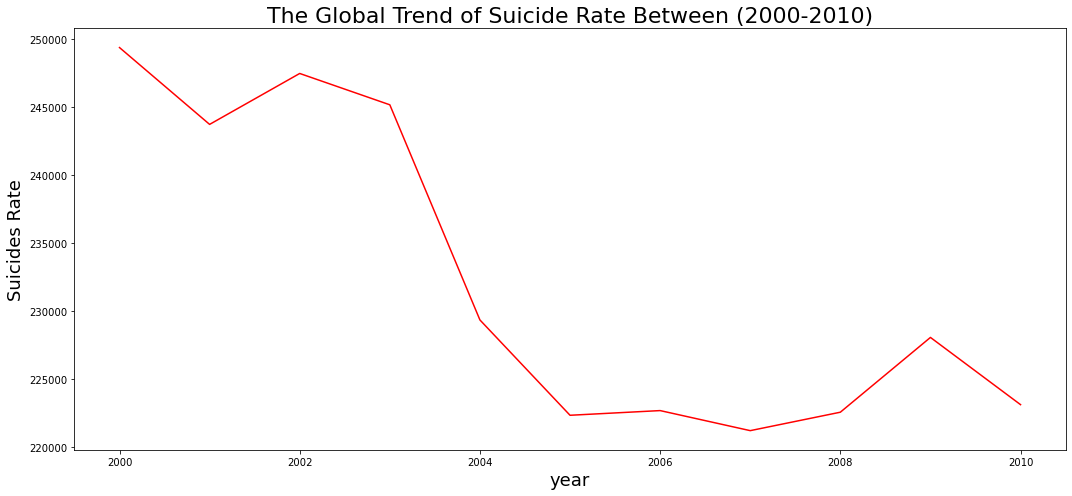

In [134]:
# bar plot showing the global trend of the suicide no per year

suicide_global_trend_year = suicide_data_2000s.groupby('year')['suicides_no'].sum()
suicide_global_trend_year.plot(kind='line', figsize=(15,7),color="r")
plt.title('The Global Trend of Suicide Rate Between (2000-2010)', fontsize=22)
plt.xlabel("year", fontsize=18)
plt.ylabel("Suicides Rate", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/suicide_global_trend.pdf')
plt.show()

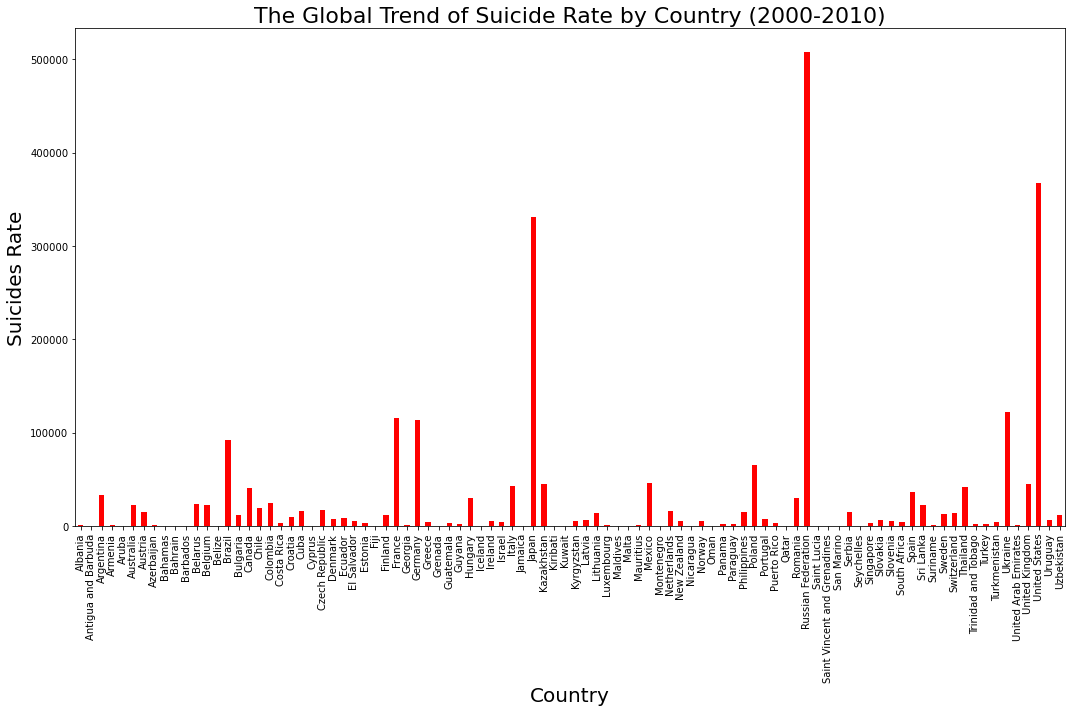

In [135]:
# bar plot showing the global trend of the suicide rate per country 

suicide_global_trend_country = suicide_data_2000s_by_country['suicides_no'].sum()
suicide_global_trend_country.plot(kind='bar', figsize=(15,10),color="r")
#suicides_no_stats['suicides_no_mean']
plt.title('The Global Trend of Suicide Rate by Country (2000-2010)', fontsize=22)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Suicides Rate", fontsize=20)
plt.tight_layout()
plt.savefig('output_data_AL/suicide_global_trend_by_country.pdf')
plt.show()

In [136]:
# Top 5 countries with highest suicide no 
suicide_no_per_country = suicide_data_2000s.groupby('country')['suicides_no'].agg('sum').sort_values(ascending=False).head(5)
suicide_no_per_country

country
Russian Federation    507682
United States         367309
Japan                 331561
Ukraine               122627
France                116110
Name: suicides_no, dtype: int64

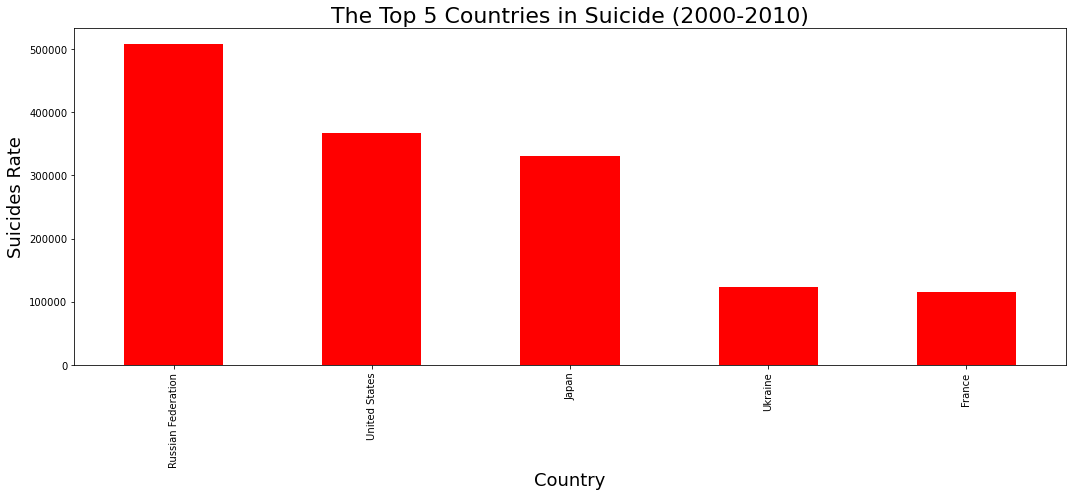

In [137]:
suicide_no_per_country.plot(kind='bar', figsize=(15,7),color="r")                                                                 
plt.title('The Top 5 Countries in Suicide (2000-2010)', fontsize=22)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Suicides Rate", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/top_5_countries.pdf')
plt.show()

In [138]:
# suicide no per continent 
suicide_no_per_continent = suicide_data_2000s.groupby('continent')['suicides_no'].agg('sum')
suicide_no_per_continent

continent
Africa             5389
Asia             997758
Europe           843275
North America    490322
Oceania           28666
South America    189877
Name: suicides_no, dtype: int64

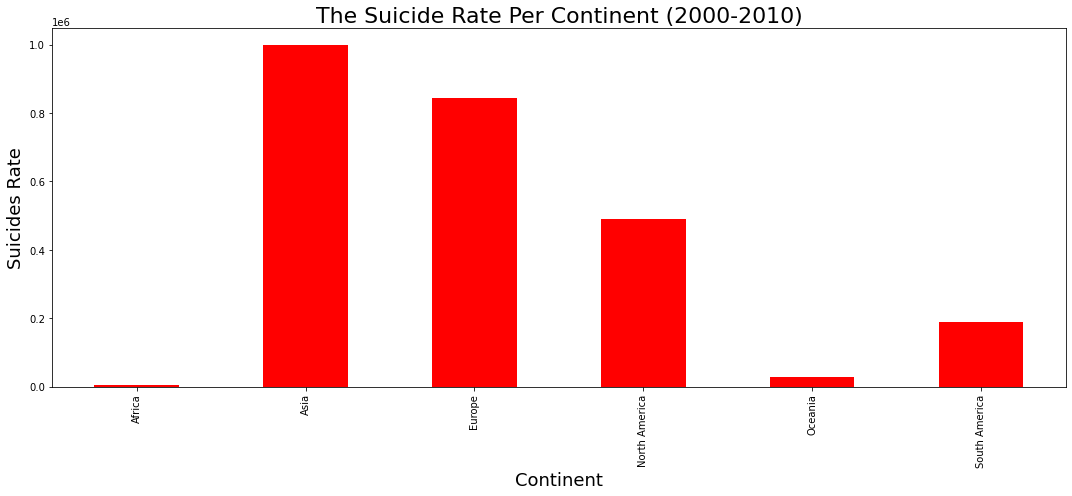

In [139]:
suicide_no_per_continent.plot(kind='bar', figsize=(15,7),color="r")                                                                 
plt.title('The Suicide Rate Per Continent (2000-2010)', fontsize=22)
plt.xlabel("Continent", fontsize=18)
plt.ylabel("Suicides Rate", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/suicide_no_per_continent.pdf')
plt.show()

In [140]:
# bar plot showing relationt between the age group and suicide no
suicide_age_grp = suicide_data_2000s.groupby('age')['suicides_no'].agg('sum')
suicide_age_grp

age
15-24 years    311930
25-34 years    412685
35-54 years    964718
5-14 years      19880
55-74 years    610406
75+ years      235668
Name: suicides_no, dtype: int64

In [ ]:
# What is the relationship between age groups on suicide rates?

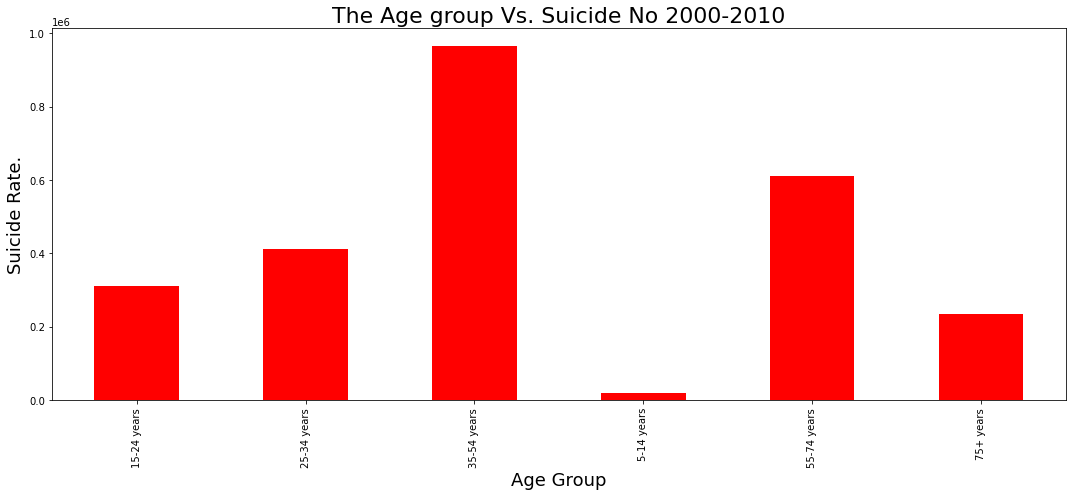

In [141]:
suicide_vs_age = suicide_age_grp.plot(kind='bar', figsize=(15,7), color="r")
plt.title('The Age group Vs. Suicide No 2000-2010', fontsize=22)
plt.xlabel("Age Group", fontsize=18)
plt.ylabel("Suicide Rate.", fontsize=18)
plt.tight_layout()
plt.savefig('output_data_AL/Age_vs_suicide_no.pdf')
plt.show()

In [ ]:
#  Are men or women more likely to commit suicide?

In [142]:
# Generate pie plot showing the distribution of female versus male suicide percent
suicide_gender = suicide_data_2000s.groupby("sex")

gender_suicide_percent = 100*suicide_gender['suicides_no'].sum()/suicide_data_2000s['suicides_no'].sum()
gender_suicide_percent

sex
female    21.61538
male      78.38462
Name: suicides_no, dtype: float64

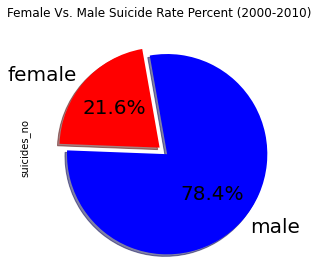

In [143]:
# Pie Plot
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='sex', title="Female Vs. Male Suicide Rate Percent (2000-2010)",\
                startangle=100, autopct='%1.1f%%',shadow=True, fontsize=20, colors =["r","b"],legend =False, explode =(0, 0.1))
plt.tight_layout()
plt.savefig('output_data_AL/gender_suicide_percent.pdf')
plt.show()

In [144]:
# what is the impact of economical status on the suicide rate?
gdp_per_capita = suicide_data_2000s.groupby('country').agg({'suicides_no':'sum','gdp_per_capita ($)':'mean'})
gdp_per_capita

,suicides_no,gdp_per_capita ($)
country,,
Albania,956,2939.545455
Antigua and Barbuda,8,12751.200000
Argentina,33476,7055.727273
Armenia,592,2112.555556
Aruba,75,24823.727273
...,...,...
United Arab Emirates,622,42162.000000
United Kingdom,45456,40639.636364
United States,367309,46433.636364


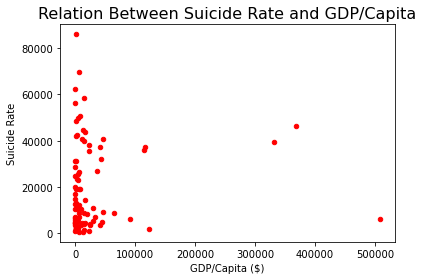

In [145]:
gdp_per_capita.plot(kind='scatter', x='suicides_no', y='gdp_per_capita ($)', color='r')
plt.title('Relation Between Suicide Rate and GDP/Capita', fontsize=16)
plt.xlabel("GDP/Capita ($)", fontsize=10)
plt.ylabel("Suicide Rate", fontsize=10)
plt.savefig('output_data_AL/GDP_vs_suicide_no.pdf')
plt.show()

In [146]:
suicides_no = gdp_per_capita.iloc[:,0]
gdp_per_capita = gdp_per_capita.iloc[:,1]
correlation = st.pearsonr(suicides_no,gdp_per_capita)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

The correlation coefficient between both factors is 0.09


very weak correlation between the GDP and the Suicide rate 

# Shanker's Code

In [108]:
merged_suicide_df = world_suicide_data.merge(continents_list_data,on='country')
merged_suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [109]:
merged_suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19084
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
Continent                 0
dtype: int64

In [170]:
# merged_suicide_df.drop(['HDI for year'],axis=1,inplace=True)

In [171]:
merged_suicide_df.groupby(['country']).count()


,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
country,,,,,,,,,,,
Albania,264,264,264,264,264,264,264,264,264,264,264
Antigua and Barbuda,324,324,324,324,324,324,324,324,324,324,324
Argentina,372,372,372,372,372,372,372,372,372,372,372
Armenia,298,298,298,298,298,298,298,298,298,298,298
Aruba,168,168,168,168,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,72,72,72,72,72,72,72,72,72,72,72
United Kingdom,372,372,372,372,372,372,372,372,372,372,372
United States,372,372,372,372,372,372,372,372,372,372,372


In [172]:
# Group by country and count corresponding values to get common countries

merged_df_groupby_country = merged_suicide_df.groupby(['country']).count().reset_index()

common_countries_list = merged_df_groupby_country[merged_df_groupby_country['year'] == 372]['country'].unique().tolist()


In [173]:
common_countries_list

['Argentina',
 'Belgium',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Greece',
 'Israel',
 'Italy',
 'Japan',
 'Luxembourg',
 'Malta',
 'Mexico',
 'Puerto Rico',
 'Singapore',
 'Spain',
 'United Kingdom',
 'United States']

In [174]:
len(common_countries_list)

18

In [175]:
merged_suicide_df_finalqc = merged_suicide_df[merged_suicide_df["year"]<2016]

In [176]:
merged_suicide_df_finalqc = merged_suicide_df_finalqc[merged_suicide_df_finalqc["country"].isin(common_countries_list)].reset_index()

In [177]:
merged_suicide_df_finalqc.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,"88,416,668,900",3264,G.I. Generation,South America
1,589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,"88,416,668,900",3264,G.I. Generation,South America
2,590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,"88,416,668,900",3264,Silent,South America
3,591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,"88,416,668,900",3264,G.I. Generation,South America
4,592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,"88,416,668,900",3264,Boomers,South America


In [178]:
sub_suicide_rate_df = merged_suicide_df_finalqc.groupby(['year']).sum()[['suicides_no','population']].reset_index()

In [179]:
sub_suicide_rate_df['Suicide_Rate'] = sub_suicide_rate_df['suicides_no']/sub_suicide_rate_df['population']*100000

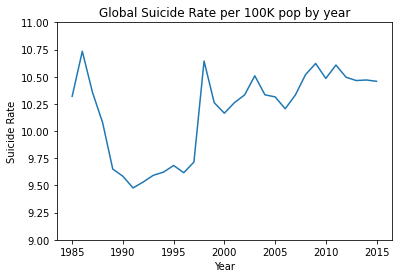

In [180]:
x_axis = sub_suicide_rate_df['year']
y_axis = sub_suicide_rate_df['Suicide_Rate']


plt.plot(x_axis , y_axis)

plt.ylim((9,11))

plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Global Suicide Rate per 100K pop by year')
plt.savefig("Images_sn/Global Suicide Rate by Year.png")

plt.show()

(50000.0, 90000.0)

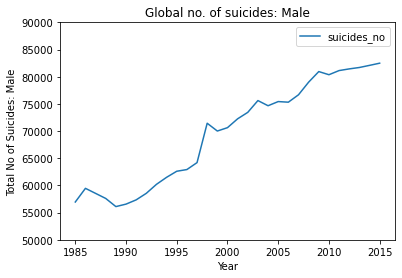

In [181]:
sub_suicide_no_gender_df = merged_suicide_df_finalqc.groupby(["year","sex"]).sum()["suicides_no"].reset_index()

sub_suicide_no_gender_df= sub_suicide_no_gender_df.set_index("year")

sub_suicide_no_gender_df[sub_suicide_no_gender_df['sex'] == 'male'].plot()

plt.xlabel('Year')
plt.ylabel('Total No of Suicides: Male')

plt.title("Global no. of suicides: Male")
plt.savefig("Images_sn/Global Suicide Rate by Gender-Male.png")


plt.ylim((50000,90000))



(10000.0, 50000.0)

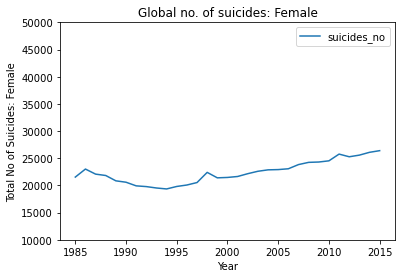

In [182]:
sub_suicide_no_gender_df[sub_suicide_no_gender_df['sex'] == 'female'].plot()
plt.xlabel('Year')
plt.ylabel('Total No of Suicides: Female')
plt.title("Global no. of suicides: Female")

plt.savefig("Images_sn/Global Suicide Rate by Gender-Female.png")


plt.ylim((10000,50000))


(1000.0, 2000.0)

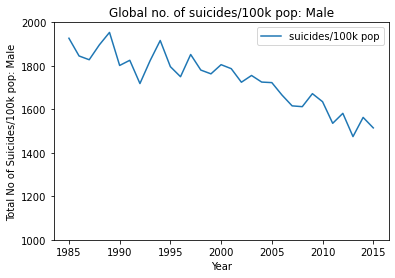

In [183]:
sub_suicide_per100k_gender_df = merged_suicide_df_finalqc.groupby(["year","sex"]).sum()["suicides/100k pop"].reset_index()

sub_suicide_per100k_gender_df= sub_suicide_per100k_gender_df.set_index("year")

sub_suicide_per100k_gender_df[sub_suicide_per100k_gender_df['sex'] == 'male'].plot()

plt.xlabel('Year')
plt.ylabel('Total No of Suicides/100k pop: Male')

plt.title("Global no. of suicides/100k pop: Male")

plt.savefig("Images_sn/Global Suicide Rate per 100k by Gender-Male.png")


plt.ylim((1000,2000))


(100.0, 1000.0)

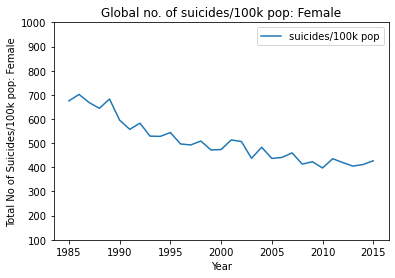

In [184]:
sub_suicide_per100k_gender_df[sub_suicide_per100k_gender_df['sex'] == 'female'].plot()

plt.xlabel('Year')
plt.ylabel('Total No of Suicides/100k pop: Female')

plt.title("Global no. of suicides/100k pop: Female")

plt.savefig("Images_sn/Global Suicide Rate per 100k by Gender-Female.png")


plt.ylim((100,1000))

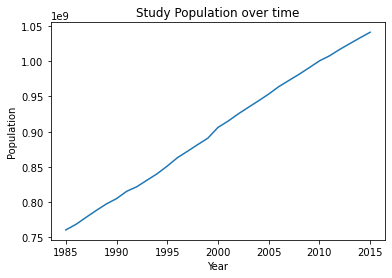

In [185]:
sub_suicide_no_gender_df = merged_suicide_df_finalqc.groupby(["year"]).sum()["population"].reset_index()

sub_suicide_no_gender_df= sub_suicide_no_gender_df.set_index("year")

sub_suicide_no_gender_df['population'].plot()
# sub_suicide_no_gender_df['suicides_no'].plot()
plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Study Population over time")

plt.savefig("Images_sn/Population over time.png")


# plt.ylim((50000,90000))

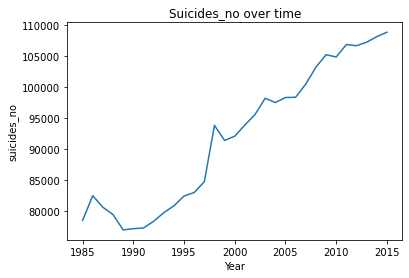

In [186]:
sub_suicide_no_gender_df = merged_suicide_df_finalqc.groupby(["year"]).sum()["suicides_no"].reset_index()

sub_suicide_no_gender_df= sub_suicide_no_gender_df.set_index("year")

sub_suicide_no_gender_df['suicides_no'].plot()
# sub_suicide_no_gender_df['suicides_no'].plot()
plt.xlabel('Year')
plt.ylabel('suicides_no')

plt.title("Suicides_no over time")

plt.savefig("Images_sn/Number of suicides over time.png")


# plt.ylim((50000,90000))

# Suicide number has only gone by by 35,000 from 1985 to 2016; however population has gone up by 300 million

In [187]:
                                                                                          
sub_suicide_rate_continent = merged_suicide_df_finalqc.groupby(['Continent','year']).sum()[["suicides_no","population"]].reset_index()

In [188]:
sub_suicide_rate_continent['Suicide_Rate_Continent'] = sub_suicide_rate_continent['suicides_no']/sub_suicide_rate_continent['population']*100000

In [189]:
sub_suicide_rate_continent['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America'], dtype=object)

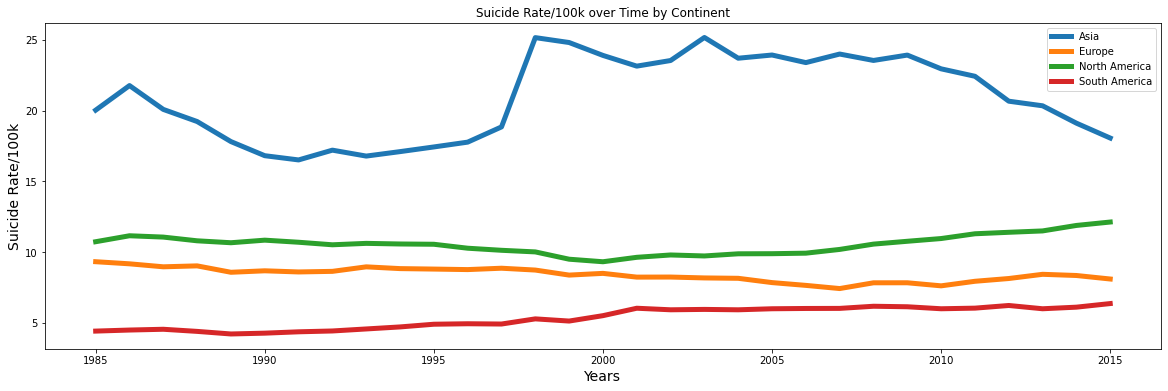

In [190]:
plt.figure(figsize=(20,6))
for continent in ('Asia', 'Europe', 'North America', 'South America'):
    
    file_c = sub_suicide_rate_continent[sub_suicide_rate_continent['Continent'] == continent].set_index("year")["Suicide_Rate_Continent"].reset_index().set_index("year")
    
    x=file_c.index.tolist()
    y=file_c["Suicide_Rate_Continent"]
    plt.plot(x,y, linewidth=5, label=continent)
    #plt.yticks(np.arange(0,65000, step=10000), fontsize=12)
    #plt.xticks(np.arange(1985,2016, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("Suicide Rate/100k", fontsize=14)
    
    plt.title("Suicide Rate/100k over Time by Continent")
    
    plt.savefig("Images_sn/Suicide Rate_per_100k over Time by Continent.png")

    
plt.legend()
plt.show()

In [191]:
sub_total_country = merged_suicide_df_finalqc.groupby(["year","country"]).sum()[["suicides_no","population"]].reset_index()

In [192]:
sub_total_gdp =merged_suicide_df_finalqc[["country","year","gdp_per_capita ($)"]].drop_duplicates()

In [193]:
sub_total_gdp_country = pd.merge(sub_total_country,sub_total_gdp, on =["country","year"], how = "left")

In [194]:
sub_total_gdp_country["suicide_rate"] = (sub_total_gdp_country["suicides_no"]/sub_total_gdp_country["population"])*100000

In [195]:
sub_total_gdp_country['gdp'] = (sub_total_gdp_country["gdp_per_capita ($)"]*sub_total_gdp_country["population"])/1000000000

In [196]:
sub_total_gdp_country.head()

,year,country,suicides_no,population,gdp_per_capita ($),suicide_rate,gdp
0,1985,Argentina,1988,27090800,3264,7.338285,88.424371
1,1985,Belgium,2281,9269600,9356,24.607319,86.726378
2,1985,Brazil,4228,117478900,1898,3.598944,222.974952
3,1985,Chile,683,10675400,1658,6.397887,17.699813
4,1985,Colombia,1001,25052400,1393,3.995625,34.897993


In [197]:
###let us see "Argentina"
def scatter_plot(country):
  p = sub_total_gdp_country[sub_total_gdp_country["country"]==country]
  x =p["suicides_no"]
  y = p["gdp"]
  plt.scatter(x,y)
  plt.title("suicide_rate vs gdp")
  plt.xlabel("suicide_rate",fontsize=14)
  plt.ylabel("gdp",fontsize=14)


The correlation between both factors is 0.31


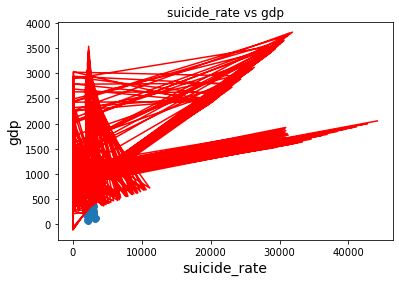

In [198]:
###let us see "Argentina"
def scatter_plot(country):
  p = sub_total_gdp_country[sub_total_gdp_country["country"]==country]
  x =p["suicides_no"]
  y = p["gdp"]
  plt.scatter(x,y)
  plt.title("suicide_rate vs gdp")
  plt.xlabel("suicide_rate",fontsize=14)
  plt.ylabel("gdp",fontsize=14)

suicide_rate = sub_total_gdp_country.iloc[:,5]
gdp = sub_total_gdp_country.iloc[:,6]
correlation = st.pearsonr(suicide_rate,gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(sub_total_gdp_country['suicide_rate'], sub_total_gdp_country['gdp'])
regress_values = sub_total_gdp_country['suicide_rate'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(sub_total_gdp_country['suicides_no'],regress_values,"r-", label=line_eq)


scatter_plot("Argentina")
# plt.show()

In [199]:
###let us see "Argentina"
def scatter_plot__suicide_v_gdp(country):
  p = sub_total_gdp_country[sub_total_gdp_country["country"]==country]
  x =p["gdp"]
  y = p["suicides_no"]
  plt.scatter(x,y)
    
  plt.title("suicide_rate vs gdp")

  plt.xlabel("gdp",fontsize=14)
  plt.ylabel("suicide_rate",fontsize=14)

  plt.savefig("Images_sn/SuicideRateversusGDP.png")




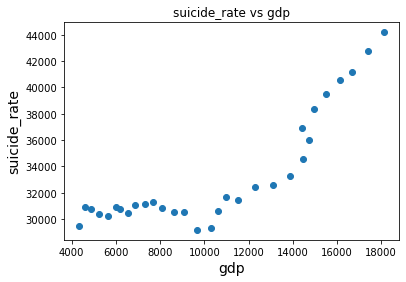

In [200]:
scatter_plot__suicide_v_gdp("United States")

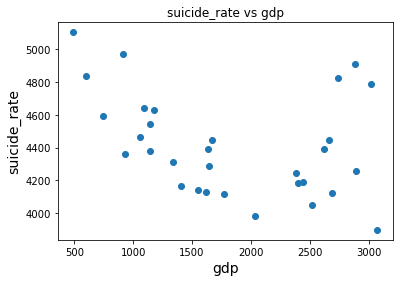

In [201]:
scatter_plot__suicide_v_gdp("United Kingdom")

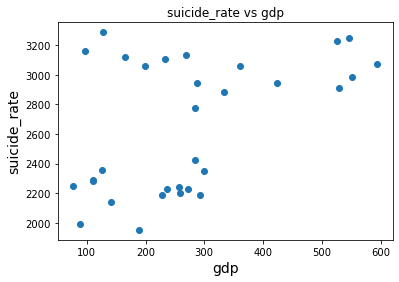

In [202]:
scatter_plot__suicide_v_gdp("Argentina")

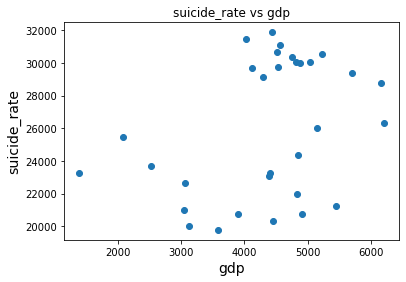

In [203]:
scatter_plot__suicide_v_gdp("Japan")

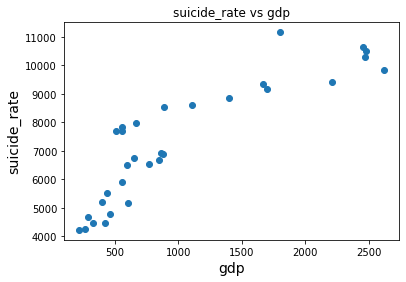

In [204]:
scatter_plot__suicide_v_gdp("Brazil")

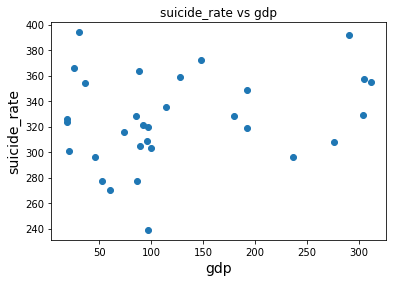

In [205]:
scatter_plot__suicide_v_gdp("Singapore")

# Top 5 Countries by Year


In [206]:
####top 5 countris with higherst suicide rate in different year
total_country = merged_suicide_df.groupby(['country','year']).sum()[["suicides_no","population"]].reset_index()

In [207]:
total_country["suicide_rate"] = (total_country['suicides_no']/total_country['population'])*100000

In [208]:
total_country =total_country.drop(["suicides_no","suicides_no"],axis = 1)

In [209]:
def top_5countries_suicide_by_year(year):
  p =total_country[total_country['year'] == year][['suicide_rate','year','country']].reset_index().set_index('country')['suicide_rate']
  q= p.reset_index().set_index('country').sort_values("suicide_rate", ascending = False)
  q[:5].plot(kind='bar')

  plt.xlabel("Country",fontsize=14)
  plt.ylabel("suicide_rate",fontsize=14)

  plt.title("Top 5 Suicide Rate by Country by Year")
    
  plt.savefig("Images_sn/Top 5 Suicide countries by Year.png")


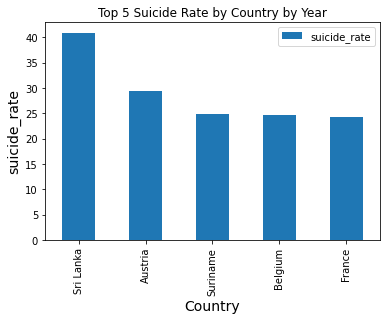

In [210]:
top_5countries_suicide_by_year(1985)

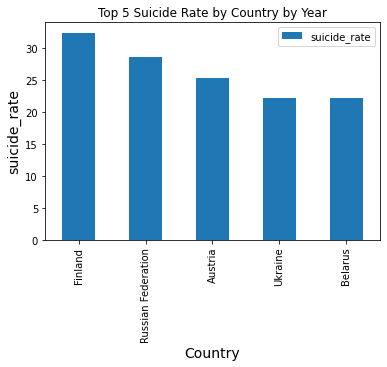

In [211]:
top_5countries_suicide_by_year(1990)

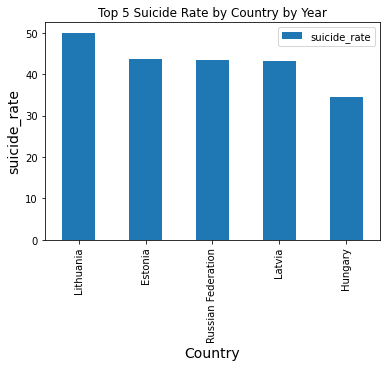

In [212]:
top_5countries_suicide_by_year(1995)

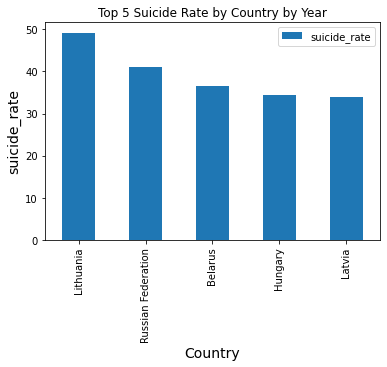

In [213]:
top_5countries_suicide_by_year(2000)

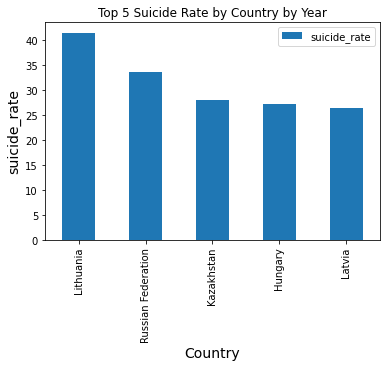

In [214]:
top_5countries_suicide_by_year(2005)

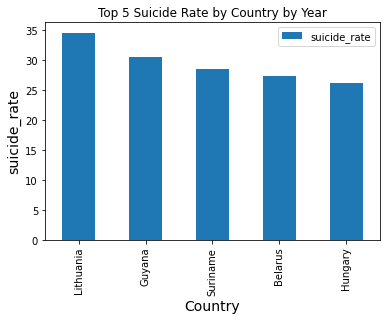

In [215]:
top_5countries_suicide_by_year(2010)

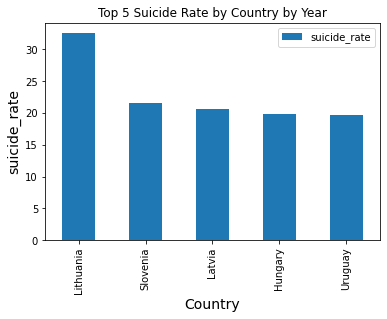

In [216]:
top_5countries_suicide_by_year(2015)

# Top 5 countries by Continent

In [217]:
####top 5 countris with higherst suicide rate in different year in continents

total_country_continent = merged_suicide_df.groupby(['country','Continent','year']).sum()[["suicides_no","population"]].reset_index()

In [218]:
total_country_continent["suicide_rate"] = (total_country_continent['suicides_no']/total_country_continent['population'])*100000

In [219]:
total_country_continent.head()

,country,Continent,year,suicides_no,population,suicide_rate
0,Albania,Europe,1987,73,2709600,2.694125
1,Albania,Europe,1988,63,2764300,2.279058
2,Albania,Europe,1989,68,2803100,2.425886
3,Albania,Europe,1992,47,2822500,1.665190
4,Albania,Europe,1993,73,2807300,2.600363


In [220]:
total_country_continent =total_country_continent.drop(["suicides_no","suicides_no"],axis = 1)

In [221]:
def maxsuicidecountry(year,Continent):
  p =total_country_continent[(total_country_continent['year'] == year) &(total_country_continent['Continent'] == Continent)][['suicide_rate','year','country']].reset_index().set_index('country')['suicide_rate']
  q= p.reset_index().set_index('country').sort_values("suicide_rate", ascending = False)
  q[:5].plot(kind='bar')

  plt.xlabel("Country",fontsize=14)
  plt.ylabel("suicide_rate",fontsize=14)

  plt.title("Top 5 Suicide Rate by Continent by Year")

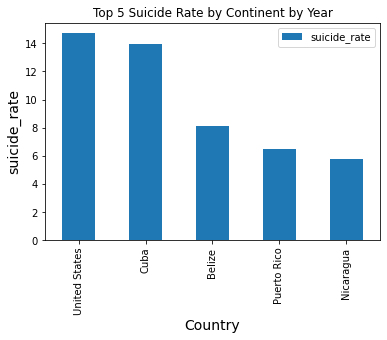

In [222]:
###change the value of yeara
maxsuicidecountry(2015,"North America")

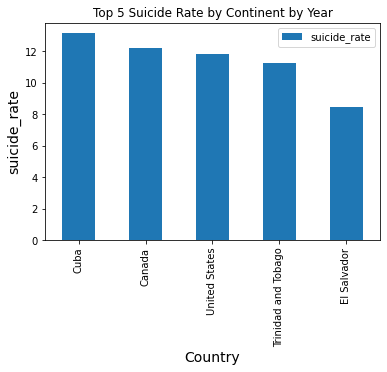

In [223]:
maxsuicidecountry(2005,"North America")

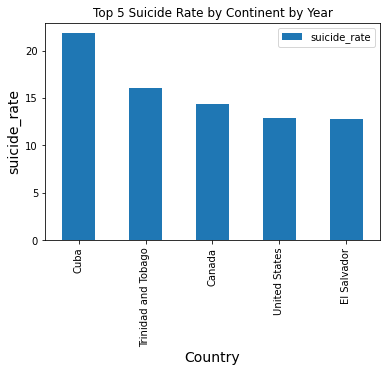

In [224]:
maxsuicidecountry(1995,"North America")

# Age Group Study

In [225]:
sub_total_agegroup = merged_suicide_df_finalqc.groupby(['age','year']).sum()[["suicides_no","population"]].reset_index()

In [226]:
sub_total_agegroup["suicide_rate"] = (sub_total_agegroup['suicides_no']/sub_total_agegroup['population'])*100000

In [227]:
sub_total_agegroup =sub_total_agegroup.drop(["suicides_no","suicides_no"],axis = 1)

In [228]:
age_group = sub_total_agegroup['age'].unique().tolist()

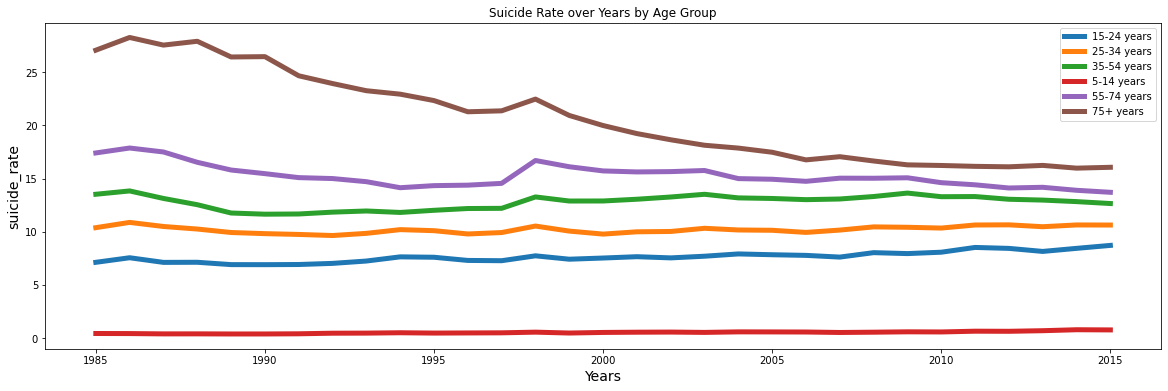

In [229]:
####continent analysis
import numpy as np
plt.figure(figsize=(20,6))
for c in age_group:
    
    file_c=sub_total_agegroup[sub_total_agegroup['age']==c].set_index("year")["suicide_rate"].reset_index().set_index("year")
    
    x=file_c.index.tolist()
    y=file_c["suicide_rate"]
    plt.plot(x,y, linewidth=5, label=c)
    #plt.yticks(np.arange(0,65000, step=10000), fontsize=12)
    #plt.xticks(np.arange(1985,2016, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("suicide_rate", fontsize=14)
    
    plt.title("Suicide Rate over Years by Age Group")
    
    plt.savefig("Images_sn/Suicide Rate by Age Group.png")

    
plt.legend()
plt.show()


In [230]:
pop_vs_suicides = merged_suicide_df.groupby("year").sum()[["suicides_no","population"]]

In [231]:
pop_vs_suicides = pop_vs_suicides.drop(2016).reset_index()

In [232]:
pop_vs_suicides.head()

,year,suicides_no,population
0,1985,112374,971883386
1,1986,117212,992369213
2,1987,123541,1056914826
3,1988,118077,1015393924
4,1989,157221,1186342847


In [233]:
pop_vs_suicides['Suicide_Rate'] = pop_vs_suicides['suicides_no']/pop_vs_suicides['population']*100000

In [234]:
pop_vs_suicides.head()

,year,suicides_no,population,Suicide_Rate
0,1985,112374,971883386,11.562498
1,1986,117212,992369213,11.811330
2,1987,123541,1056914826,11.688832
3,1988,118077,1015393924,11.628689
4,1989,157221,1186342847,13.252577


In [235]:
x = pop_vs_suicides['population'].values.reshape(-1,1)
y =pop_vs_suicides['suicides_no'].values.reshape(-1,1)

regressor = LinearRegression()  
model = regressor.fit(x,y)

In [236]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[16107.19844598]
[[0.00011983]]


In [237]:
y_pred = model.predict(x)

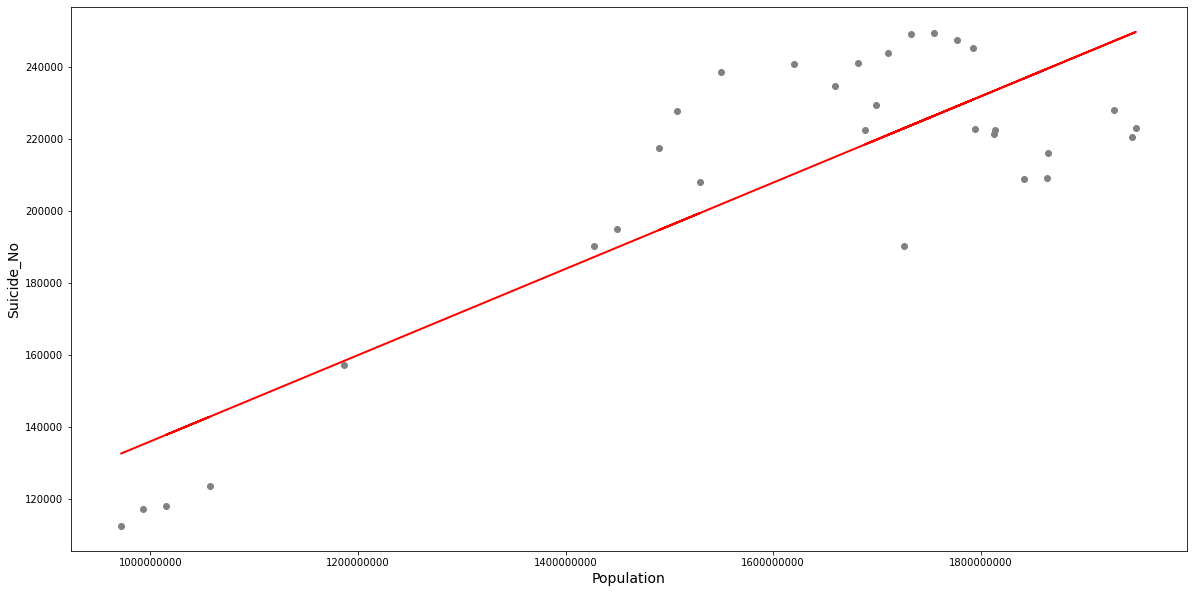

In [238]:
plt.figure(figsize=(20,10))
plt.scatter(x, y,  color='gray')

plt.plot(x, y_pred, color='red', linewidth=2)
ax = plt.gca()
#plt.figure(figsize=(20,20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.xlabel("Population",fontsize=14)
plt.ylabel("Suicide_No",fontsize=14)

plt.savefig("Images_sn/No. of Suicides versus Population.png")

plt.show()

[12.97174314]
[[7.99478022e-12]]


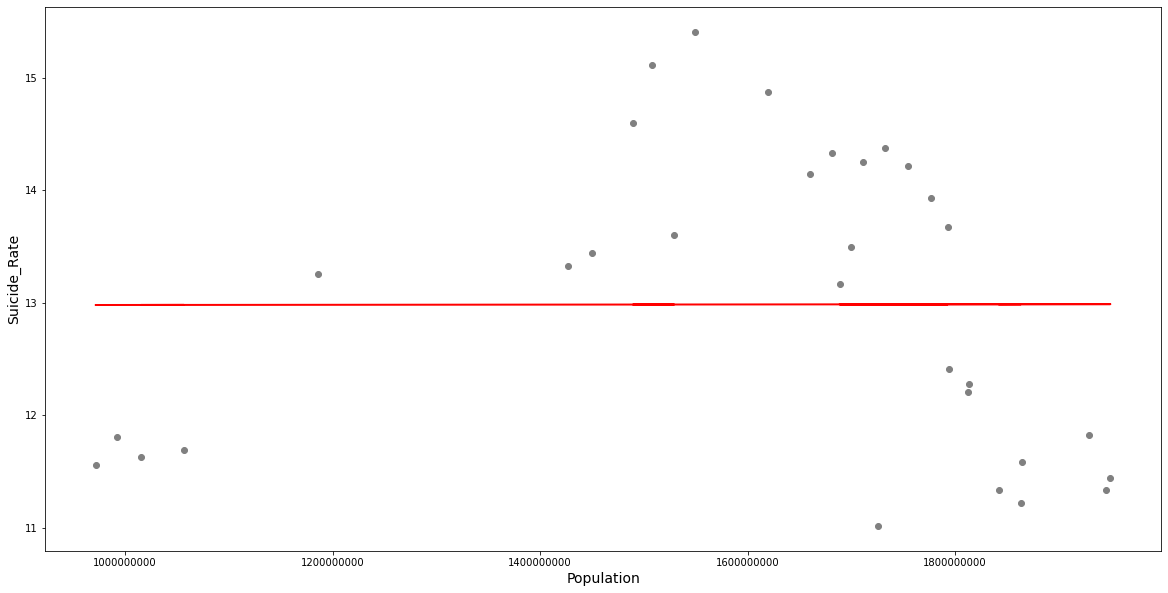

In [239]:
x = pop_vs_suicides['population'].values.reshape(-1,1)
y =pop_vs_suicides['Suicide_Rate'].values.reshape(-1,1)

regressor = LinearRegression()  
model = regressor.fit(x,y)

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

y_pred = model.predict(x)

plt.figure(figsize=(20,10))
plt.scatter(x, y,  color='gray')

plt.plot(x, y_pred, color='red', linewidth=2)
ax = plt.gca()
#plt.figure(figsize=(20,20))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.xlabel("Population",fontsize=14)
plt.ylabel("Suicide_Rate",fontsize=14)

plt.savefig("Images_sn/Suicide Rate versus Population.png")

plt.show()


# Doing regression fit with Rice Class method

In [240]:
population = pop_vs_suicides.iloc[:,2]
Suicide_Rate = pop_vs_suicides.iloc[:,3]
correlation = st.pearsonr(population,Suicide_Rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_vs_suicides['population'], pop_vs_suicides['Suicide_Rate'])
regress_values = pop_vs_suicides['population'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


The correlation between both factors is 0.0
The equation of the line fitted through the data is: y = 0.0x + 12.97


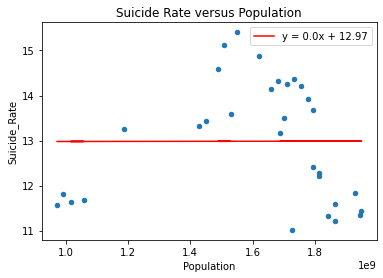

In [241]:
pop_vs_suicides.plot(kind='scatter', x='population', y='Suicide_Rate')
plt.plot(pop_vs_suicides['population'],regress_values,"r-", label=line_eq)
plt.legend()
plt.xlabel('Population')
plt.title('Suicide Rate versus Population')

plt.savefig("Images/Suicide Rate versus Population.png")

plt.show()

# Relation Between GDP and Suicide Rate


In [242]:
pop = merged_suicide_df.groupby("year").sum()[["population"]].reset_index()
x = pop["population"].values.reshape(-1,1)
total_gdp =merged_suicide_df[["year","gdp_per_capita ($)"]].drop_duplicates()

gdp = total_gdp.groupby("year").sum()["gdp_per_capita ($)"].reset_index()

y = gdp["gdp_per_capita ($)"].values.reshape(-1,1)

regressor = LinearRegression()  
model_2 = regressor.fit(x,y)

print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)



[-782074.09409725]
[[0.00127528]]


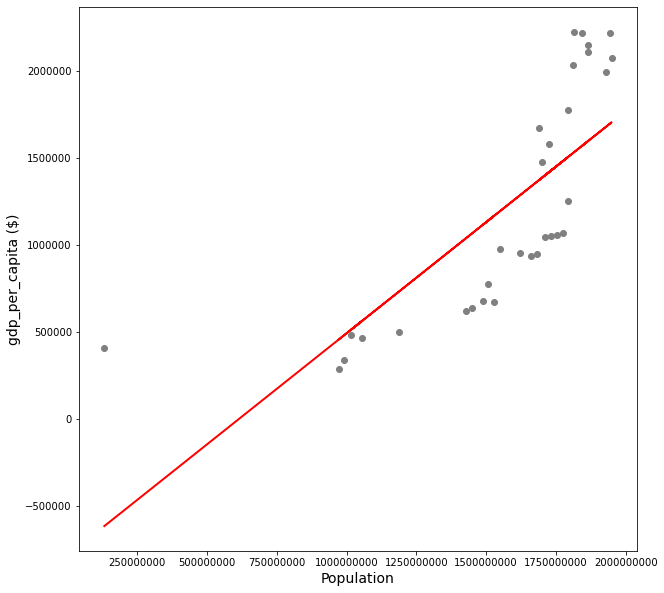

In [243]:
y_pred = model_2.predict(x)

plt.figure(figsize=(10,10))

plt.scatter(x, y,  color='gray')
plt.plot(x, y_pred, color='red', linewidth=2)
ax = plt.gca()


plt.xlabel("Population",fontsize=14)
plt.ylabel("gdp_per_capita ($)",fontsize=14)

plt.savefig("Images_sn/No. of Suicides versus Population.png")

ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

-253777.2820884572
[ 3.13166089e+01  3.13166090e+01  1.22765018e-04  1.58049930e+04
 -2.55666928e-03]


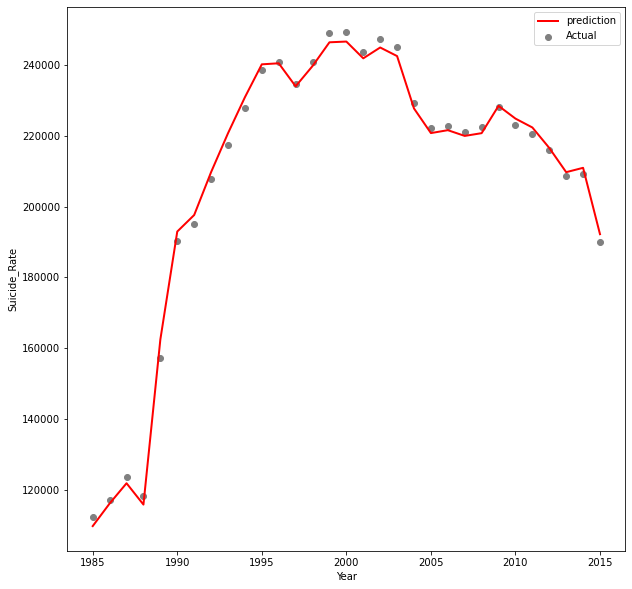

In [244]:
final_data = pd.merge(pop_vs_suicides.reset_index(),gdp,on="year")
final_data = final_data[final_data['year']< 2016]
x= final_data.drop("suicides_no",axis =1)
y = final_data["suicides_no"]
regressor = LinearRegression()  
model_2 = regressor.fit(x,y)
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)
y_pred = model_2.predict(x)
y_pred


plt.figure(figsize=(10,10))
plt.scatter(x['year'], y,  color='gray', label = "Actual")
plt.plot(x['year'], y_pred, color='red', linewidth=2, label ="prediction")
plt.xlabel("Year")
plt.ylabel("Suicide_Rate")
plt.legend()
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
# plt.legend(('x', 'line-regression y={}'.format(y)), 'best')

plt.savefig("Prediction of Suicide no- Multivariate Regression.png")


plt.show()

In [245]:
from sklearn.metrics import r2_score

In [246]:
r2_score(y_pred,y)

0.9971112534086458

21.24821313488357
[-4.73199244e-03 -4.73199244e-03  6.06598777e-05 -7.14739838e-09
  8.01306862e-08]


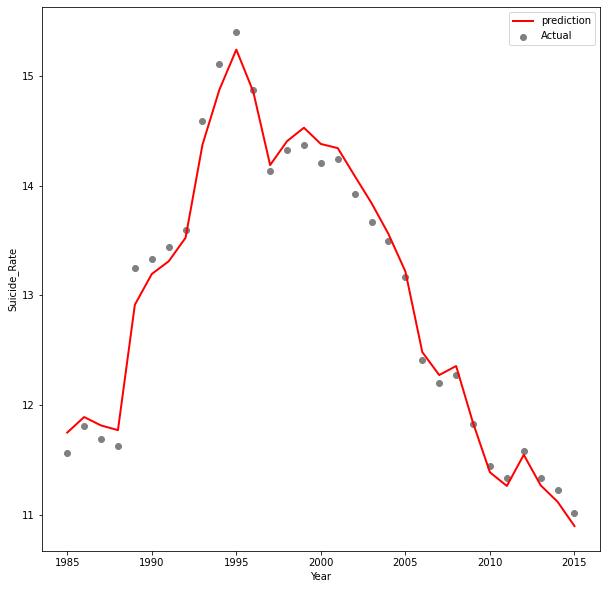

In [247]:
final_data = pd.merge(pop_vs_suicides.reset_index(),gdp,on="year")
final_data = final_data[final_data['year']< 2016]
x= final_data.drop("Suicide_Rate",axis =1)
y = final_data["Suicide_Rate"]
regressor = LinearRegression()  
model_2 = regressor.fit(x,y)
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)
y_pred = model_2.predict(x)
y_pred


plt.figure(figsize=(10,10))
plt.scatter(x['year'], y,  color='gray', label = "Actual")
plt.plot(x['year'], y_pred, color='red', linewidth=2, label ="prediction")
plt.xlabel("Year")
plt.ylabel("Suicide_Rate")
plt.legend()
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.savefig("Prediction of Suicide Rate- Multivariate Regression.png")

plt.show()

# Heat map of the dataset shwoing covariance matrix

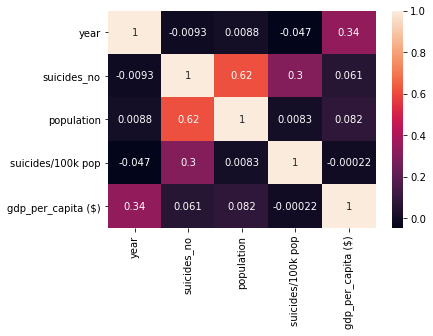

In [248]:
sns.heatmap(merged_suicide_df.corr(),annot=True)


## Multi-variate regression model- USA


In [249]:
United_States = merged_suicide_df[merged_suicide_df["country"]=="United States"].reset_index()
United_States_total=United_States.groupby(["year"]).sum()[['suicides_no','population','gdp_per_capita ($)']].reset_index()

#Rate of Suicides per 100k population

United_States_total['suicides'] = (United_States_total['suicides_no']/United_States_total['population'])*100000

United_States_total = United_States_total.drop(["suicides_no","population"],axis = 1)

y =United_States_total['suicides']
X = United_States_total.drop(['suicides'],axis=1)


In [250]:
United_States_total.head()

,year,gdp_per_capita ($),suicides
0,1985,236316,13.340703
1,1986,247056,13.855835
2,1987,259572,13.672340
3,1988,277236,13.365999
4,1989,295848,13.167630


In [269]:
from xgboost import XGBRegressor

xgb = XGBRegressor()  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
xgb.fit(X_train,y_train)

y_pred1 = xgb.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
rmse2= np.sqrt(mean_squared_error(y_test,y_pred1))
r2score_usa=r2_score(y_test,y_pred1)
rmse2


0.23902120844993768

In [270]:
r2score_usa

0.8101252572123121

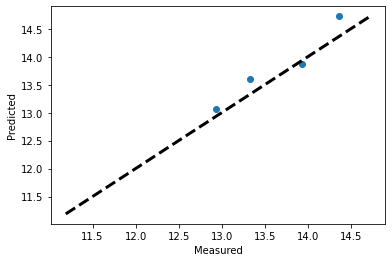

In [271]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.savefig("Predicted versus measured-Mulitvariaate regression_Part2.png")

plt.show()

## Multi-variate regression model- Italy


In [272]:
# Repeating regression analysis for Italy also
Italy = merged_suicide_df[merged_suicide_df["country"]=="Italy"].reset_index()
Italy_total=Italy.groupby(["year"]).sum()[['suicides_no','population','gdp_per_capita ($)']].reset_index()

#Rate of Suicides per 100k population

Italy_total['suicides'] = (Italy_total['suicides_no']/Italy_total['population'])*100000

Italy_total = Italy_total.drop(["suicides_no","population"],axis = 1)

y1 =Italy_total['suicides']
X1 = Italy_total.drop(['suicides'],axis=1)



In [273]:
from xgboost import XGBRegressor

xgb = XGBRegressor()  
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=101)
xgb.fit(X_train1,y_train1)

y_pred2 = xgb.predict(X_test1)

from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
rmse2= np.sqrt(mean_squared_error(y_test1,y_pred2))
r2_score_italy=r2_score(y_test1,y_pred2)
rmse2


0.2585248044181552

In [276]:
r2_score_italy

0.7872135538246307

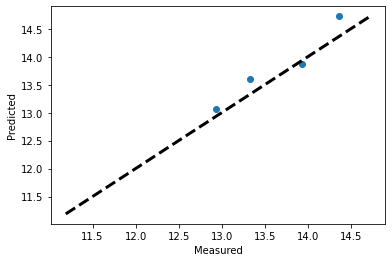

In [277]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.savefig("Predicted versus measured-Mulitvariaate regression_Part2.png")

plt.show()